當前工作目錄 ==> /home/jovyan
Left Down point:    0 , 0
Right Up  point: 6000 , 11180
height(min, max) 0.0 , 357.21


Done


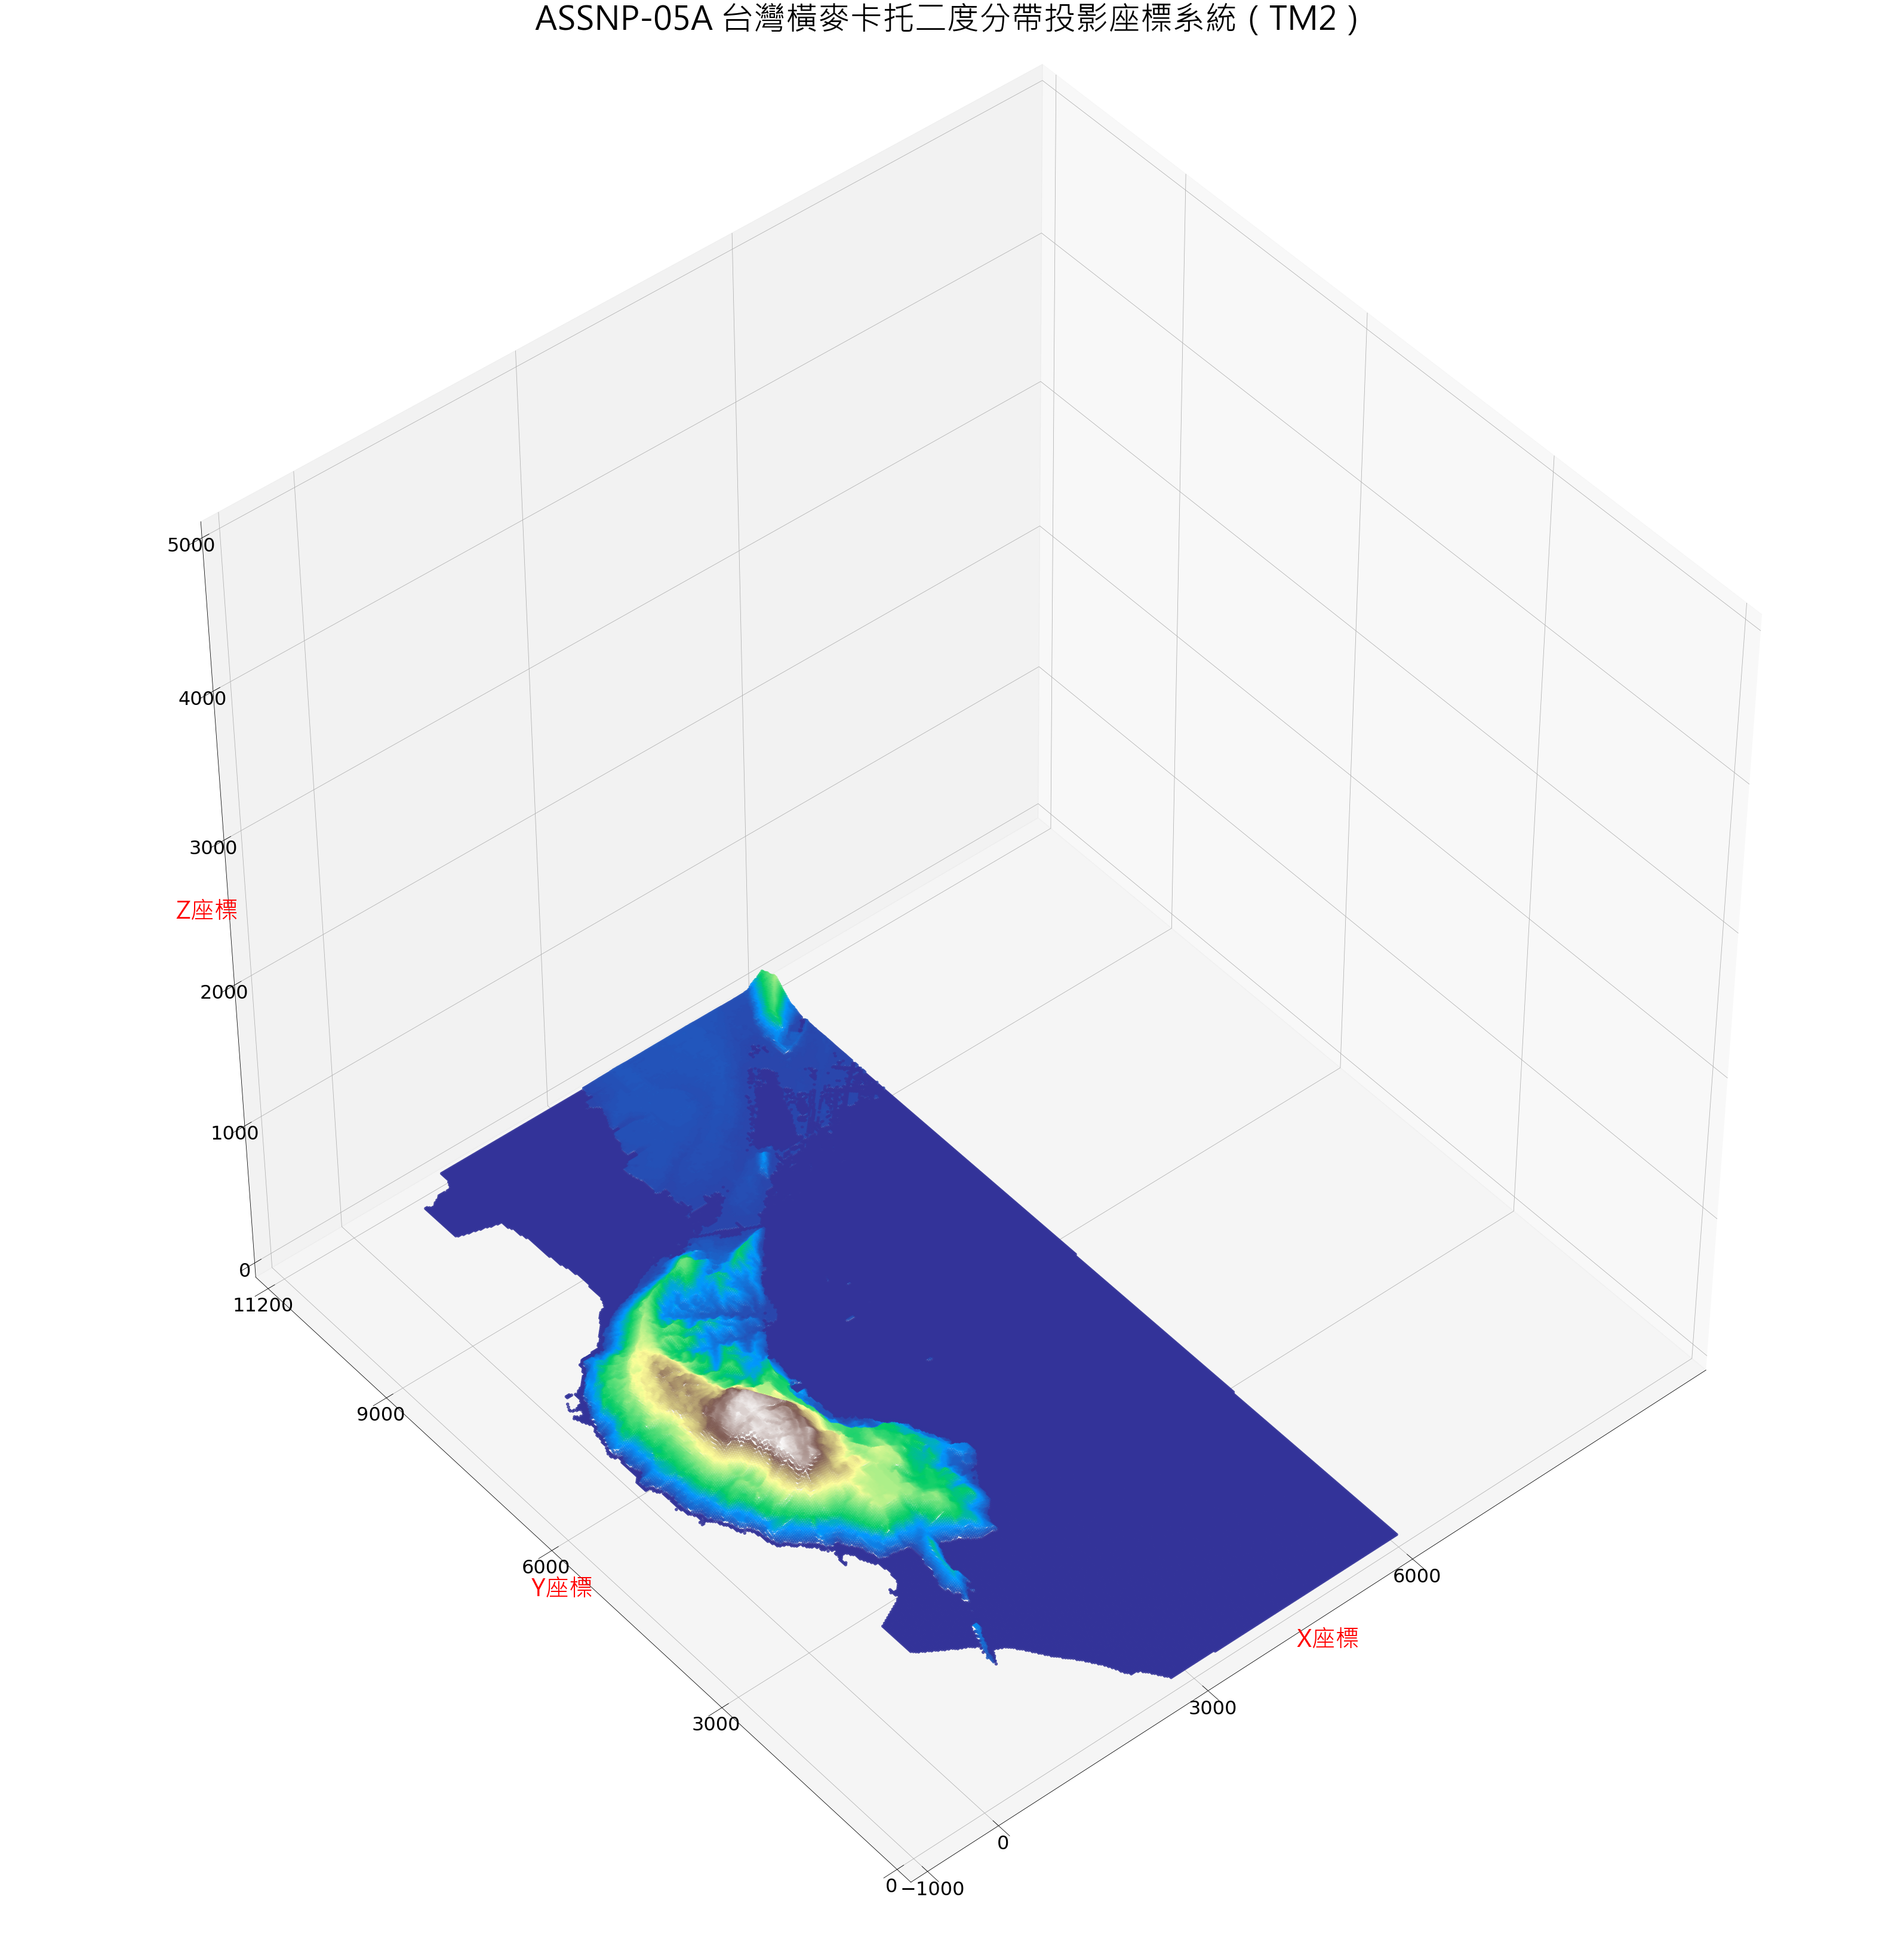

In [5]:
# ASSNP-05A.py
# 2018-11-30
#
# 從 dem-all-7.csv文字檔 載入資料
# delimiter=',' --> 定界符是','
# unpack=True   --> transposed array (將陣列進行轉置)
# x,y,z = np.loadtxt(path_data + 'dem_all-7.csv', delimiter=',', unpack=True)
# 將轉置後的陣列行解包到指定的變數x,y,z中。
#
import os
# to fix matplotlib warning
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from mpl_toolkits.mplot3d.axes3d import *
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
path_data    = './data/'
path_graphic = './graphic/'
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# -----------------------------------------------------------
#
# Left Down point:    0 ,     0
# Right Up  point: 6000 , 11180
# height(min, max) 0.0 , 357.21
#
tup7 = set_graphic_area(112,112)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
ax  = fig.add_subplot(1,1,1, projection='3d')
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-1000,10200)  # set xlim to xMinMax[0], xMinMax[1]
plt.ylim(    0,11200)  # set ylim to yMinMax[0], yMinMax[1]
ax.set_zlim(-1,5000)   # set zlim same scale to show graphic normally
#
# 6000, 11180
x_ticks = [-1000,0,3000,6000]
y_ticks = [0,3000,6000,9000,11200]
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=32)
#
ax.set_xlabel('X座標', fontproperties=myfont, fontsize=40)
ax.set_ylabel('Y座標', fontproperties=myfont, fontsize=40)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=40)
#
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
#
# 逐筆讀入資料 dem-all-5.csv (140547 row)
# Read from the file into the array data(:,:)
# array data shape is (140547, 3)
#
# Columns:
# data[..., 0] is array of float number, 二度分帶 X座標
# data[..., 1] is array of float number, 二度分帶 y座標
# data[..., 2] is array of float number, DEM file z value, float type
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
xs,ys,TM2_Z = np.loadtxt(path_data + 'dem-all-5.csv', delimiter=',', unpack=True)
print('Left Down point:   ', int(np.amin(xs)), ',', int(np.amin(ys)))
print('Right Up  point:',    int(np.amax(xs)), ',', int(np.amax(ys)))
print('height(min, max)',      np.amin(TM2_Z), ',', np.amax(TM2_Z))
print ('\n')
#
# xs --> TM2_X 二度分帶 X座標
# ys --> TM2_Y 二度分帶 Y座標
# TM2_Z DEM file z value, float type
#
# here xs, ys, TM2_Z ===> list type
#
ax.scatter3D(xs, ys, TM2_Z, c=TM2_Z, cmap=plt.cm.terrain, alpha=0.8) # good
ax.view_init(elev=45, azim=230)
plt.draw()
#
# 設定子圖的標題
ax.set_title('ASSNP-05A 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=54)
#
# bbox_inches='tight' is for display ylabel
# PDF chinese display not OK
# plt.savefig(path_graphic + "ASSNP-05A.pdf", dpi=150, bbox_inches='tight')
#
# PNG chinese display OK
plt.savefig(path_graphic + "ASSNP-05A.png", dpi=150, bbox_inches='tight')
#
print ('Done')